#  Local Data ETL

![image](https://www.webopedia.com/imagesvr_ce/5182/etl-diagram.JPG)[Image-Reference](https://www.webopedia.com/imagesvr_ce/5182/etl-diagram.JPG)

### Instructions

* [**Extraction**](#Extraction)

  * Download all data
  * Read CSV data into pandas Dataframes
  

* [**Transform**](#Transform)

  * Copy only the columns needed into a new DataFrame
  * Rename columns
  * Handle any duplicates
  * Dealing with missing Data
  * Looking at Ranges and see if distribution of values in a column make sense, using stats (e.g. min, max, mean, standard deviation) and visualizations
  * matching data types of columns to their content
  

* [**Load**](#Load)

  * Create a connection to database.
  * Check for a successful connection to the database and confirm that the tables have been created.
  * Append DataFrames to tables. Be sure to use the index set earlier.
  * Confirm successful **Load** by querying database.

______

## Extraction

Data are already downloaded from [SMARD](https://www.smard.de/home) website. SMARD is an abbreviation of the German term “Strommarktdaten”, which translates to electricity market data. Data that is published on SMARD’s website gives an up-to-date and in-depth overview of what is happening on the German electricity market. 

Datasets that we have downloaded are:

* Electricity Consumption in Germany
* Electricity Generation in Germany
* Installed Capacity in Germany
* Electricity Price

All these datasets have records from 2015 to 2019  

In [167]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!ls ../Data/

Actual_consumption_201501010000_201701012345_1.csv
Actual_consumption_201701010000_201901012345_1.csv
Actual_consumption_201901010000_202101012345_1.csv
Actual_generation_201501010000_201701012345_1.csv
Actual_generation_201701010000_201901012345_1.csv
Actual_generation_201901010000_202101012345_1.csv
Day-ahead_prices_201501010000_201701012359_1.csv
Day-ahead_prices_201701010000_201901012359_1.csv
Day-ahead_prices_201901010000_202101012359_1.csv
Installed_generation_capacity_201501010000_201712312359_1.csv
Installed_generation_capacity_201701010000_201912312359_1.csv
Installed_generation_capacity_201901010000_202112312359_1.csv


In [5]:
consumption1= pd.read_csv('../Data/Actual_consumption_201501010000_201701012345_1.csv', delimiter=';')
consumption2= pd.read_csv('../Data/Actual_consumption_201701010000_201901012345_1.csv', delimiter=';')
consumption3= pd.read_csv('../Data/Actual_consumption_201901010000_202101012345_1.csv', delimiter=';')

In [6]:
print(consumption1.shape)
print(consumption2.shape)
print(consumption3.shape)

(70271, 3)
(70175, 3)
(38880, 3)


In [7]:
consumption1.head()

,Date,Time of day,Total[MWh]
0,"Jan 1, 2015",12:00 AM,"10,606.25"
1,"Jan 1, 2015",12:15 AM,"10,505.25"
2,"Jan 1, 2015",12:30 AM,"10,517"
3,"Jan 1, 2015",12:45 AM,"10,468.5"
4,"Jan 1, 2015",1:00 AM,"10,307.5"


In [8]:
consumption2.head()

,Date,Time of day,Total[MWh]
0,"Jan 1, 2017",12:00 AM,"11,178"
1,"Jan 1, 2017",12:15 AM,"11,159.25"
2,"Jan 1, 2017",12:30 AM,"11,121"
3,"Jan 1, 2017",12:45 AM,"11,053.5"
4,"Jan 1, 2017",1:00 AM,"10,908"


In [9]:
consumption3.head()

,Date,Time of day,Total[MWh]
0,"Jan 1, 2019",12:00 AM,"10,690"
1,"Jan 1, 2019",12:15 AM,"10,653.5"
2,"Jan 1, 2019",12:30 AM,"10,607.75"
3,"Jan 1, 2019",12:45 AM,"10,612.25"
4,"Jan 1, 2019",1:00 AM,"10,465.5"


In [10]:
generation1= pd.read_csv('../Data/Actual_generation_201501010000_201701012345_1.csv'
                         , delimiter=';', low_memory=False)
generation2= pd.read_csv('../Data/Actual_generation_201701010000_201901012345_1.csv'
                         , delimiter=';', low_memory=False)
generation3= pd.read_csv('../Data/Actual_generation_201901010000_202101012345_1.csv'
                         , delimiter=';', low_memory=False)

In [11]:
print(generation1.shape)
print(generation2.shape)
print(generation3.shape)

(70271, 14)
(70175, 14)
(38880, 14)


In [12]:
generation1.head()

,Datum,Uhrzeit,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh]
0,"Jan 1, 2015",12:00 AM,"1,006",288,130,"2,028",0,33,"2,686","3,977",686,262,368,"1,236"
1,"Jan 1, 2015",12:15 AM,"1,007",288,129,"2,023",0,33,"2,646","3,963",721,261,328,"1,214"
2,"Jan 1, 2015",12:30 AM,"1,007",293,129,"2,040",0,33,"2,661","3,925",696,259,360,"1,219"
3,"Jan 1, 2015",12:45 AM,"1,005",290,129,"2,037",0,33,"2,718","3,872",665,225,280,"1,243"
4,"Jan 1, 2015",1:00 AM,999,295,129,"2,046",0,33,"2,772","3,899",521,190,185,"1,248"


In [13]:
generation1.head()

,Datum,Uhrzeit,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh]
0,"Jan 1, 2015",12:00 AM,"1,006",288,130,"2,028",0,33,"2,686","3,977",686,262,368,"1,236"
1,"Jan 1, 2015",12:15 AM,"1,007",288,129,"2,023",0,33,"2,646","3,963",721,261,328,"1,214"
2,"Jan 1, 2015",12:30 AM,"1,007",293,129,"2,040",0,33,"2,661","3,925",696,259,360,"1,219"
3,"Jan 1, 2015",12:45 AM,"1,005",290,129,"2,037",0,33,"2,718","3,872",665,225,280,"1,243"
4,"Jan 1, 2015",1:00 AM,999,295,129,"2,046",0,33,"2,772","3,899",521,190,185,"1,248"


In [14]:
generation2.head()

,Date,Time of day,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh]
0,"Jan 1, 2017",12:00 AM,"1,181",284.0,825,"3,012",0,45.0,"1,614","3,318","1,110",291,48,"1,161"
1,"Jan 1, 2017",12:15 AM,"1,178",285.0,826,"3,029",0,44.0,"1,616","3,336","1,115",291,54,"1,157"
2,"Jan 1, 2017",12:30 AM,"1,177",285.0,826,"3,055",0,44.0,"1,614","3,321","1,149",289,57,"1,144"
3,"Jan 1, 2017",12:45 AM,"1,176",285.0,827,"3,023",0,44.0,"1,614","3,323","1,162",287,56,"1,090"
4,"Jan 1, 2017",1:00 AM,"1,175",285.0,827,"3,017",0,44.0,"1,616","3,424","1,212",290,31,"1,194"


In [15]:
generation3.head()

,Date,Time of day,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh]
0,"Jan 1, 2019",12:00 AM,"1,231.5",401,794.75,"4,751",0,27.5,"2,250.5","1,729",724.5,630.5,29.5,494.25
1,"Jan 1, 2019",12:15 AM,"1,234.25",394.75,794,"4,937.25",0,27.5,"2,263.25","1,583.75",618,601.75,80,544.25
2,"Jan 1, 2019",12:30 AM,"1,231.5",381.25,792.25,"5,118.5",0,27.5,"2,246","1,551.25",537.5,585,29,546
3,"Jan 1, 2019",12:45 AM,"1,233.5",381,755.5,"5,188.75",0,27.5,"2,241.75","1,455",487.5,576.5,29.25,546
4,"Jan 1, 2019",1:00 AM,"1,229",388.25,715.5,"5,297.5",0,27.5,"2,224.5","1,363.75",503.75,546.25,29,543


In [16]:
installed1= pd.read_csv('../Data/Installed_generation_capacity_201501010000_201712312359_1.csv', delimiter=';')
installed2= pd.read_csv('../Data/Installed_generation_capacity_201701010000_201912312359_1.csv', delimiter=';')
installed3= pd.read_csv('../Data/Installed_generation_capacity_201901010000_202112312359_1.csv', delimiter=';')

In [17]:
print(installed1.shape)
print(installed2.shape)
print(installed3.shape)

(3, 14)
(3, 14)
(2, 14)


In [18]:
installed1

,Date,Time of day,Biomass[MW],Hydropower[MW],Wind offshore[MW],Wind onshore[MW],Photovoltaics[MW],Other renewable[MW],Nuclear[MW],Fossil brown coal[MW],Fossil hard coal[MW],Fossil gas[MW],Hydro pumped storage[MW],Other conventional[MW]
0,"Jan 1, 2015",12:00 AM,"6,808","5,507",993,"37,701","37,271",483,"12,068","21,160","26,190","31,734","8,699","7,437"
1,"Jan 1, 2016",12:00 AM,"6,815","5,514","3,283","41,168","38,686",545,"10,793","21,062","26,264","32,398","8,699","7,576"
2,"Jan 1, 2017",12:00 AM,"7,080","5,446","4,131","47,042","40,834",550,"10,793","21,262","27,437","32,627","8,894","7,720"


In [19]:
installed2

,Date,Time of day,Biomass[MW],Hydropower[MW],Wind offshore[MW],Wind onshore[MW],Photovoltaics[MW],Other renewable[MW],Nuclear[MW],Fossil brown coal[MW],Fossil hard coal[MW],Fossil gas[MW],Hydro pumped storage[MW],Other conventional[MW]
0,"Jan 1, 2017",12:00 AM,"7,080","5,446","4,131","47,042","40,834",550,"10,793","21,262","27,437","32,627","8,894","7,720"
1,"Jan 1, 2018",12:00 AM,"7,396","5,300","5,051","51,633","42,804",534,"9,516","21,275","25,035","31,361","8,918","7,375"
2,"Jan 1, 2019",12:00 AM,"7,752","5,281","6,393","52,792","45,299",487,"9,516","21,205","25,293","31,664","9,422","7,277"


In [20]:
installed3

,Date,Time of day,Biomass[MW],Hydropower[MW],Wind offshore[MW],Wind onshore[MW],Photovoltaics[MW],Other renewable[MW],Nuclear[MW],Fossil brown coal[MW],Fossil hard coal[MW],Fossil gas[MW],Hydro pumped storage[MW],Other conventional[MW]
0,"Jan 1, 2019",12:00 AM,"7,752","5,281","6,393","52,792","45,299",487,"9,516","21,205","25,293","31,664","9,422","7,277"
1,"Jan 1, 2020",12:00 AM,"7,855","5,256","7,709","53,405","46,471",523,"8,114","21,067","22,458","31,712","9,422","7,592"


In [21]:
price1= pd.read_csv('../Data/Day-ahead_prices_201501010000_201701012359_1.csv', delimiter=';')
price2= pd.read_csv('../Data/Day-ahead_prices_201701010000_201901012359_1.csv', delimiter=';')
price3= pd.read_csv('../Data/Day-ahead_prices_201901010000_202101012359_1.csv', delimiter=';')

In [22]:
print(price1.shape)
print(price2.shape)
print(price3.shape)

(17568, 16)
(17544, 16)
(9720, 16)


In [23]:
price1.head()

,Date,Time of day,Germany/Luxembourg[Euro/MWh],Denmark 1[Euro/MWh],Denmark 2[Euro/MWh],France[Euro/MWh],Northern Italy[Euro/MWh],Netherlands[Euro/MWh],Poland[Euro/MWh],Sweden 4[Euro/MWh],Switzerland[Euro/MWh],Slovenia[Euro/MWh],Czech Republic[Euro/MWh],Hungary[Euro/MWh],Austria[Euro/MWh],Germany/Austria/Luxembourg[Euro/MWh]
0,"Jan 1, 2015",12:00 AM,-,25.02,27.38,-,-,-,-,27.38,44.94,27.30,26.48,45.07,-,-
1,"Jan 1, 2015",1:00 AM,-,18.29,18.29,-,-,-,-,23.37,43.43,23.25,24.2,44.16,-,-
2,"Jan 1, 2015",2:00 AM,-,16.04,16.04,-,-,-,-,19.33,38.08,22.20,22.06,39.17,-,-
3,"Jan 1, 2015",3:00 AM,-,14.60,14.60,-,-,-,-,17.66,35.47,19.56,20.27,26.93,-,-
4,"Jan 1, 2015",4:00 AM,-,14.95,14.95,-,-,-,-,17.53,30.83,18.88,19.17,20.94,-,-


In [24]:
price2.head()

,Date,Time of day,Germany/Luxembourg[Euro/MWh],Denmark 1[Euro/MWh],Denmark 2[Euro/MWh],France[Euro/MWh],Northern Italy[Euro/MWh],Netherlands[Euro/MWh],Poland[Euro/MWh],Sweden 4[Euro/MWh],Switzerland[Euro/MWh],Slovenia[Euro/MWh],Czech Republic[Euro/MWh],Hungary[Euro/MWh],Austria[Euro/MWh],Germany/Austria/Luxembourg[Euro/MWh]
0,"Jan 1, 2017",12:00 AM,-,20.96,20.96,58.82,53,42,24.03,24.03,57.04,53.00,18.5,57.25,-,20.96
1,"Jan 1, 2017",1:00 AM,-,20.90,20.90,58.23,52,49.94,24.03,24.03,51.94,52.00,13.0,50.21,-,20.9
2,"Jan 1, 2017",2:00 AM,-,18.13,18.13,51.95,51,51.95,24.02,24.02,49.07,51.00,16.0,44.04,-,18.13
3,"Jan 1, 2017",3:00 AM,-,16.03,16.03,47.27,47.27,40.99,23.04,23.19,45.01,47.27,16.4,32.81,-,16.03
4,"Jan 1, 2017",4:00 AM,-,16.43,16.43,45.49,45.49,39,18.87,24.1,42.4,45.49,16.0,28.41,-,16.43


In [25]:
price3.head()

,Date,Time of day,Germany/Luxembourg[Euro/MWh],Denmark 1[Euro/MWh],Denmark 2[Euro/MWh],France[Euro/MWh],Northern Italy[Euro/MWh],Netherlands[Euro/MWh],Poland[Euro/MWh],Sweden 4[Euro/MWh],Switzerland[Euro/MWh],Slovenia[Euro/MWh],Czech Republic[Euro/MWh],Hungary[Euro/MWh],Austria[Euro/MWh],Germany/Austria/Luxembourg[Euro/MWh]
0,"Jan 1, 2019",12:00 AM,28.32,28.32,28.32,51,-,68.92,-,28.32,50.26,51,8.5,59.9,33.48,-
1,"Jan 1, 2019",1:00 AM,10.07,10.07,10.07,46.27,-,64.98,-,10.07,48.74,46.27,3.97,52.71,39.76,-
2,"Jan 1, 2019",2:00 AM,-4.08,-4.08,-4.08,39.78,-,60.27,-,10.03,47.24,39.78,4.7,36.49,39.78,-
3,"Jan 1, 2019",3:00 AM,-9.91,-9.91,-9.91,27.87,-,49.97,-,4.56,36.29,27.87,0.93,31.24,27.87,-
4,"Jan 1, 2019",4:00 AM,-7.41,-7.41,-7.41,23.21,-,47.66,-,4.83,30.09,-0.36,3.9,25.98,-0.36,-


All the Datasets have benn imported successfully. 

## Transform

**We start by merging data**.

In [26]:
consumption= pd.concat([consumption1,consumption2,consumption3], axis=0)
print(consumption.shape)

(179326, 3)


In [27]:
generation= pd.concat([generation1,generation2,generation3], axis=0)
print(generation.shape)

(179326, 16)


In [260]:
installed= pd.concat([installed1,installed2,installed3], axis=0)
print(installed.shape)

(8, 14)


In [29]:
price= pd.concat([price1,price2,price3], axis=0)
print(price.shape)

(44832, 16)


**Let's explore datasets.**

* **Electricity Consumption Dataset**

In [30]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179326 entries, 0 to 38879
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         179326 non-null  object
 1   Time of day  179326 non-null  object
 2   Total[MWh]   179326 non-null  object
dtypes: object(3)
memory usage: 5.5+ MB


In [31]:
consumption.describe()

,Date,Time of day,Total[MWh]
count,179326,179326,179326
unique,1866,96,39021
top,"Jan 1, 2019",2:00 AM,-
freq,191,1868,612


There isn't any NaN value. But the data types are not correct.

In [32]:
# Check for duplicates
consumption.duplicated().sum()

190

In [33]:
consumption.drop_duplicates(inplace=True)

In [34]:
consumption.duplicated().sum()

0

**Correct Datatypes**

In [35]:
consumption.head(5)

,Date,Time of day,Total[MWh]
0,"Jan 1, 2015",12:00 AM,"10,606.25"
1,"Jan 1, 2015",12:15 AM,"10,505.25"
2,"Jan 1, 2015",12:30 AM,"10,517"
3,"Jan 1, 2015",12:45 AM,"10,468.5"
4,"Jan 1, 2015",1:00 AM,"10,307.5"


In [36]:
consumption['timestamp']= consumption.apply(lambda x: (x['Date']+x['Time of day']), axis=1 )\
                                     .apply(lambda x: datetime.strptime(x, '%b %d, %Y%I:%M %p'))\
                                     .apply(lambda x: pd.to_datetime(x))

In [37]:
consumption.head()

,Date,Time of day,Total[MWh],timestamp
0,"Jan 1, 2015",12:00 AM,"10,606.25",2015-01-01 00:00:00
1,"Jan 1, 2015",12:15 AM,"10,505.25",2015-01-01 00:15:00
2,"Jan 1, 2015",12:30 AM,"10,517",2015-01-01 00:30:00
3,"Jan 1, 2015",12:45 AM,"10,468.5",2015-01-01 00:45:00
4,"Jan 1, 2015",1:00 AM,"10,307.5",2015-01-01 01:00:00


Date and times are successfully merged and turned into datetime format.

In [39]:
consumption['Total[MWh]']= consumption['Total[MWh]'].apply(lambda x: '0' if x=='-' else x)

In [40]:
consumption['Total[MWh]']= consumption['Total[MWh]'].apply(lambda x: ''.join(x.split(','))).astype('float')

In [41]:
consumption.head()

,Date,Time of day,Total[MWh],timestamp
0,"Jan 1, 2015",12:00 AM,10606.25,2015-01-01 00:00:00
1,"Jan 1, 2015",12:15 AM,10505.25,2015-01-01 00:15:00
2,"Jan 1, 2015",12:30 AM,10517.00,2015-01-01 00:30:00
3,"Jan 1, 2015",12:45 AM,10468.50,2015-01-01 00:45:00
4,"Jan 1, 2015",1:00 AM,10307.50,2015-01-01 01:00:00


**Keep necessary columns and drop others**

In [42]:
consumption.drop(columns=['Date','Time of day'], inplace=True)

In [43]:
consumption=consumption[['timestamp','Total[MWh]']]

**Rename Columns**

In [44]:
consumption.rename(columns={'Total[MWh]':'Electricity Consumption [MWh]'}, inplace=True)

In [45]:
consumption.head()

,timestamp,Electricity Consumption [MWh]
0,2015-01-01 00:00:00,10606.25
1,2015-01-01 00:15:00,10505.25
2,2015-01-01 00:30:00,10517.00
3,2015-01-01 00:45:00,10468.50
4,2015-01-01 01:00:00,10307.50


**Correct the data range**

In [46]:
consumption= consumption[consumption.timestamp.apply(lambda x: x.year) != 2020]

In [47]:
consumption.head()

,timestamp,Electricity Consumption [MWh]
0,2015-01-01 00:00:00,10606.25
1,2015-01-01 00:15:00,10505.25
2,2015-01-01 00:30:00,10517.00
3,2015-01-01 00:45:00,10468.50
4,2015-01-01 01:00:00,10307.50


In [48]:
consumption.describe(include='all')

,timestamp,Electricity Consumption [MWh]
count,175296,175296.000000
unique,175276,NaN
top,2018-10-28 02:45:00,NaN
freq,2,NaN
first,2015-01-01 00:00:00,NaN
last,2019-12-31 23:45:00,NaN
mean,NaN,13951.906294
std,NaN,2512.825378
min,NaN,0.000000
25%,NaN,11859.000000


**Check duplicates again**

In [49]:
consumption.timestamp.duplicated().sum()

20

In [50]:
consumption[consumption.timestamp.duplicated(keep=False)].sort_values(by='timestamp').head(10)

,timestamp,Electricity Consumption [MWh]
28516,2015-10-25 02:00:00,9574.75
28520,2015-10-25 02:00:00,9477.00
28517,2015-10-25 02:15:00,9527.50
28521,2015-10-25 02:15:00,9425.75
28518,2015-10-25 02:30:00,9482.25
28522,2015-10-25 02:30:00,9479.50
28519,2015-10-25 02:45:00,9417.00
28523,2015-10-25 02:45:00,9424.25
64132,2016-10-30 02:00:00,9547.50
64136,2016-10-30 02:00:00,9445.50


**Drop duplicates**

In [51]:
consumption.shape

(175296, 2)

In [52]:
consumption= consumption[~consumption.timestamp.duplicated()]

In [53]:
consumption.shape

(175276, 2)

In [54]:
consumption.head()

,timestamp,Electricity Consumption [MWh]
0,2015-01-01 00:00:00,10606.25
1,2015-01-01 00:15:00,10505.25
2,2015-01-01 00:30:00,10517.00
3,2015-01-01 00:45:00,10468.50
4,2015-01-01 01:00:00,10307.50


**Missing Timesteps**

In [55]:
print('Start Date and Time: ', consumption.timestamp.min())
print('End Date and Time:   ', consumption.timestamp.max())

Start Date and Time:  2015-01-01 00:00:00
End Date and Time:    2019-12-31 23:45:00


In [56]:
must_be_timesteps= (consumption.timestamp.max()-consumption.timestamp.min())/pd.to_timedelta(15, unit='m')+1

In [57]:
print('Existing Timesteps: ', consumption.shape[0])
print('Target Timesteps:   ', must_be_timesteps)
print('missing Timesteps:  ', must_be_timesteps-consumption.shape[0])

Existing Timesteps:  175276
Target Timesteps:    175296.0
missing Timesteps:   20.0


In [58]:
# creating reference DatetimeIndex idx_ref with a 15-minute frequency
idx_ref = pd.date_range(start=consumption.timestamp.min(), end=consumption.timestamp.max(),freq='15min')

# idx_dat represents your DatetimeIndex from the sensor
gaps = idx_ref[~idx_ref.isin(consumption.timestamp)]

In [64]:
gaps

DatetimeIndex(['2015-03-29 02:00:00', '2015-03-29 02:15:00',
               '2015-03-29 02:30:00', '2015-03-29 02:45:00',
               '2016-03-27 02:00:00', '2016-03-27 02:15:00',
               '2016-03-27 02:30:00', '2016-03-27 02:45:00',
               '2017-03-26 02:00:00', '2017-03-26 02:15:00',
               '2017-03-26 02:30:00', '2017-03-26 02:45:00',
               '2018-03-25 02:00:00', '2018-03-25 02:15:00',
               '2018-03-25 02:30:00', '2018-03-25 02:45:00',
               '2019-03-31 02:00:00', '2019-03-31 02:15:00',
               '2019-03-31 02:30:00', '2019-03-31 02:45:00'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# Dataframe for missing time steps
gaps_con= pd.DataFrame({'timestamp':gaps,'Electricity Consumption [MWh]':np.nan})

In [70]:
# Add missing timesteps with NaN value
consumption= pd.concat([consumption,gaps_con]).sort_values(by='timestamp').reset_index(drop=True)

In [ ]:
# fill NaN values with an average of last and next valid observation
consumption['Electricity Consumption [MWh]']=\
(consumption['Electricity Consumption [MWh]'].fillna(method='ffill')+\
consumption['Electricity Consumption [MWh]'].fillna(method='bfill'))/2

**Missing values**

In [131]:
# change 0 values to NaN
consumption['Electricity Consumption [MWh]']=\
consumption['Electricity Consumption [MWh]'].apply(lambda x: np.nan if x==0 else x)

In [134]:
# fill NaN values with an average of last and next valid observation
consumption['Electricity Consumption [MWh]']=\
(consumption['Electricity Consumption [MWh]'].fillna(method='ffill')+\
consumption['Electricity Consumption [MWh]'].fillna(method='bfill'))/2

In [136]:
# check NaN again
consumption.isna().sum()

timestamp                        0
Electricity Consumption [MWh]    0
dtype: int64

**Dataframe is ready**

In [117]:
consumption.head()

,timestamp,Electricity Consumption [MWh]
0,2015-01-01 00:00:00,10606.25
1,2015-01-01 00:15:00,10505.25
2,2015-01-01 00:30:00,10517.00
3,2015-01-01 00:45:00,10468.50
4,2015-01-01 01:00:00,10307.50


In [168]:
sns.set_style('darkgrid')

TypeError: 'str' object is not callable

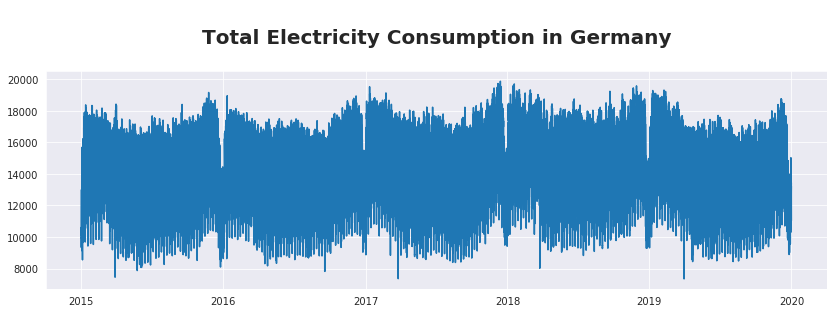

In [169]:
plt.figure(figsize=(14,4))
plt.plot(consumption.set_index('timestamp'))
plt.title('\nTotal Electricity Consumption in Germany\n', fontsize=20, fontweight='bold')
plt.ylabel(consumption.columns[1])
plt.show()

In [474]:
consumption.to_csv('../Data_Cleaned/consumption.csv', index=False)
consumption.to_pickle('../Data_Cleaned/consumption.pkl')

* **Electricity Generation Dataset**

In [120]:
generation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179326 entries, 0 to 38879
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Datum                      70271 non-null   object
 1   Uhrzeit                    70271 non-null   object
 2   Biomass[MWh]               179326 non-null  object
 3   Hydropower[MWh]            179326 non-null  object
 4   Wind offshore[MWh]         179326 non-null  object
 5   Wind onshore[MWh]          179326 non-null  object
 6   Photovoltaics[MWh]         179326 non-null  object
 7   Other renewable[MWh]       179326 non-null  object
 8   Nuclear[MWh]               179326 non-null  object
 9   Fossil brown coal[MWh]     179326 non-null  object
 10  Fossil hard coal[MWh]      179326 non-null  object
 11  Fossil gas[MWh]            179326 non-null  object
 12  Hydro pumped storage[MWh]  179326 non-null  object
 13  Other conventional[MWh]    179326 non-null  o

It looks strange because of NaN values. But the problem is one of the dataframes is in german language. That's why it couldn't concatenate correctly. We rename and translate german column names to english.

In [121]:
generation1.rename(columns={'Datum':'Date','Uhrzeit':'Time of day'}, inplace=True)

In [122]:
generation= pd.concat([generation1,generation2,generation3], axis=0)

In [123]:
generation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179326 entries, 0 to 38879
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date                       179326 non-null  object
 1   Time of day                179326 non-null  object
 2   Biomass[MWh]               179326 non-null  object
 3   Hydropower[MWh]            179326 non-null  object
 4   Wind offshore[MWh]         179326 non-null  object
 5   Wind onshore[MWh]          179326 non-null  object
 6   Photovoltaics[MWh]         179326 non-null  object
 7   Other renewable[MWh]       179326 non-null  object
 8   Nuclear[MWh]               179326 non-null  object
 9   Fossil brown coal[MWh]     179326 non-null  object
 10  Fossil hard coal[MWh]      179326 non-null  object
 11  Fossil gas[MWh]            179326 non-null  object
 12  Hydro pumped storage[MWh]  179326 non-null  object
 13  Other conventional[MWh]    179326 non-null  o

Now, it looks good.

In [124]:
generation.describe()

,Date,Time of day,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh]
count,179326,179326,179326,179326,179326,179326,179326,179326,179326,179326,179326,179326,179326,179326
unique,1866,96,1348,3191,5927,27865,19679,193,5614,13238,17397,9694,5873,8919
top,"Jan 1, 2019",2:00 AM,-,-,-,-,0,29,-,-,-,-,0,-
freq,191,1868,1144,1144,1039,1056,82189,7560,991,895,992,990,5107,1087


**Data Types**

In [125]:
generation['timestamp']= generation.apply(lambda x: (x['Date']+x['Time of day']), axis=1 )\
                                   .apply(lambda x: datetime.strptime(x, '%b %d, %Y%I:%M %p'))\
                                   .apply(lambda x: pd.to_datetime(x))

Date and times are successfully merged and turned into datetime format. We can now drop *Date* and *Time of day* columns.

In [176]:
generation.drop(['Date','Time of day'], axis=1, inplace=True)

Chage datatype to float and change - with NaN.

In [181]:
generation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179326 entries, 0 to 38879
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Biomass[MWh]               179326 non-null  object        
 1   Hydropower[MWh]            179326 non-null  object        
 2   Wind offshore[MWh]         179326 non-null  object        
 3   Wind onshore[MWh]          179326 non-null  object        
 4   Photovoltaics[MWh]         179326 non-null  object        
 5   Other renewable[MWh]       179326 non-null  object        
 6   Nuclear[MWh]               179326 non-null  object        
 7   Fossil brown coal[MWh]     179326 non-null  object        
 8   Fossil hard coal[MWh]      179326 non-null  object        
 9   Fossil gas[MWh]            179326 non-null  object        
 10  Hydro pumped storage[MWh]  179326 non-null  object        
 11  Other conventional[MWh]    179326 non-null  object   

In [196]:
generation[generation.columns[:-1]] = generation.drop(['timestamp'],axis=1)\
                                        .astype(str)\
                                        .applymap(lambda x: ''.join(x.split(',')))\
                                        .applymap(lambda x: np.nan if x=='-' else x)\
                                        .astype(float)

Check Dataframe and datatypes

In [198]:
generation.head()

,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh],timestamp
0,1006.0,288.0,130.0,2028.0,0.0,33.0,2686.0,3977.0,686.0,262.0,368.0,1236.0,2015-01-01 00:00:00
1,1007.0,288.0,129.0,2023.0,0.0,33.0,2646.0,3963.0,721.0,261.0,328.0,1214.0,2015-01-01 00:15:00
2,1007.0,293.0,129.0,2040.0,0.0,33.0,2661.0,3925.0,696.0,259.0,360.0,1219.0,2015-01-01 00:30:00
3,1005.0,290.0,129.0,2037.0,0.0,33.0,2718.0,3872.0,665.0,225.0,280.0,1243.0,2015-01-01 00:45:00
4,999.0,295.0,129.0,2046.0,0.0,33.0,2772.0,3899.0,521.0,190.0,185.0,1248.0,2015-01-01 01:00:00


In [201]:
generation.dtypes

Biomass[MWh]                        float64
Hydropower[MWh]                     float64
Wind offshore[MWh]                  float64
Wind onshore[MWh]                   float64
Photovoltaics[MWh]                  float64
Other renewable[MWh]                float64
Nuclear[MWh]                        float64
Fossil brown coal[MWh]              float64
Fossil hard coal[MWh]               float64
Fossil gas[MWh]                     float64
Hydro pumped storage[MWh]           float64
Other conventional[MWh]             float64
timestamp                    datetime64[ns]
dtype: object

**Make a nice order**

In [204]:
generation= generation[['timestamp']+generation.columns[:-1].tolist()]

**Rename Columns**

In [214]:
generation.columns=[' ['.join(i.split('[')) for i in generation.columns]

**Correct the data range**

In [216]:
generation= generation[generation.timestamp.apply(lambda x: x.year) != 2020]

In [217]:
generation.describe(include='all')

,timestamp,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Fossil brown coal [MWh],Fossil hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh]
count,175486,174949.000000,174949.000000,175052.000000,175036.000000,174883.000000,174948.000000,175102.000000,175198.000000,175101.000000,175102.000000,175102.000000,175006.000000
unique,175276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-01-01 12:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-12-31 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1119.202758,447.668489,460.782837,2333.218078,1073.817043,37.313353,2165.233100,3568.351331,1978.028442,695.324754,264.725875,1002.517838
std,NaN,84.490383,103.179825,364.156456,1929.600409,1655.382713,9.712474,364.804423,726.160756,1247.892093,537.263770,295.876215,636.688013
min,NaN,849.000000,183.000000,0.000000,22.000000,0.000000,12.000000,842.750000,938.000000,46.750000,8.000000,0.000000,75.000000
25%,NaN,1076.000000,371.000000,137.750000,874.000000,0.000000,30.000000,1917.000000,3297.000000,845.250000,260.750000,48.750000,438.250000


**Drop duplicates**

In [219]:
generation.duplicated().sum()

190

In [220]:
generation.drop_duplicates(inplace=True)

In [221]:
generation.duplicated().sum()

0

In [222]:
generation.timestamp.duplicated().sum()

20

In [223]:
generation= generation[~generation.timestamp.duplicated()]

In [224]:
generation.timestamp.duplicated().sum()

0

Duplicates are removed.

**Missing Timesteps**

In [225]:
print('Start Date and Time: ', generation.timestamp.min())
print('End Date and Time:   ', generation.timestamp.max())

Start Date and Time:  2015-01-01 00:00:00
End Date and Time:    2019-12-31 23:45:00


In [226]:
must_be_timesteps= (generation.timestamp.max()-generation.timestamp.min())/pd.to_timedelta(15, unit='m')+1

In [227]:
print('Existing Timesteps: ', generation.shape[0])
print('Target Timesteps:   ', must_be_timesteps)
print('missing Timesteps:  ', must_be_timesteps-generation.shape[0])

Existing Timesteps:  175276
Target Timesteps:    175296.0
missing Timesteps:   20.0


In [228]:
# creating reference DatetimeIndex idx_ref with a 15-minute frequency
idx_ref = pd.date_range(start=generation.timestamp.min(), end=generation.timestamp.max(),freq='15min')

# idx_dat represents your DatetimeIndex from the sensor
gaps = idx_ref[~idx_ref.isin(generation.timestamp)]

In [229]:
gaps

DatetimeIndex(['2015-03-29 02:00:00', '2015-03-29 02:15:00',
               '2015-03-29 02:30:00', '2015-03-29 02:45:00',
               '2016-03-27 02:00:00', '2016-03-27 02:15:00',
               '2016-03-27 02:30:00', '2016-03-27 02:45:00',
               '2017-03-26 02:00:00', '2017-03-26 02:15:00',
               '2017-03-26 02:30:00', '2017-03-26 02:45:00',
               '2018-03-25 02:00:00', '2018-03-25 02:15:00',
               '2018-03-25 02:30:00', '2018-03-25 02:45:00',
               '2019-03-31 02:00:00', '2019-03-31 02:15:00',
               '2019-03-31 02:30:00', '2019-03-31 02:45:00'],
              dtype='datetime64[ns]', freq=None)

In [230]:
# Dataframe for missing time steps
gaps_gen= pd.DataFrame({'timestamp':gaps})

In [234]:
# Add missing timesteps with NaN value
generation= pd.concat([generation,gaps_gen]).sort_values(by='timestamp').reset_index(drop=True)

In [238]:
# fill NaN values with an average of last and next valid observation
generation[generation.columns[1:]]=\
(generation[generation.columns[1:]].fillna(method='ffill')+\
generation[generation.columns[1:]].fillna(method='bfill'))/2

**Dataframe is ready**

In [240]:
generation.head()

,timestamp,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Fossil brown coal [MWh],Fossil hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh]
0,2015-01-01 00:00:00,1006.0,288.0,130.0,2028.0,0.0,33.0,2686.0,3977.0,686.0,262.0,368.0,1236.0
1,2015-01-01 00:15:00,1007.0,288.0,129.0,2023.0,0.0,33.0,2646.0,3963.0,721.0,261.0,328.0,1214.0
2,2015-01-01 00:30:00,1007.0,293.0,129.0,2040.0,0.0,33.0,2661.0,3925.0,696.0,259.0,360.0,1219.0
3,2015-01-01 00:45:00,1005.0,290.0,129.0,2037.0,0.0,33.0,2718.0,3872.0,665.0,225.0,280.0,1243.0
4,2015-01-01 01:00:00,999.0,295.0,129.0,2046.0,0.0,33.0,2772.0,3899.0,521.0,190.0,185.0,1248.0


TypeError: 'str' object is not callable

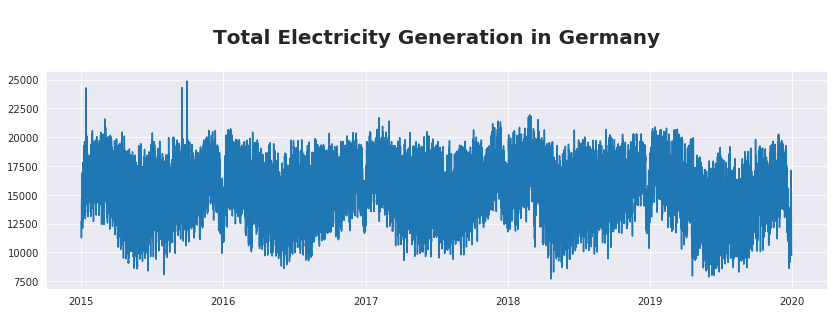

In [282]:
plt.figure(figsize=(14,4))
plt.plot(generation.timestamp,
    generation.drop('timestamp',axis=1).apply(sum, axis=1).values)
plt.title('\nTotal Electricity Generation in Germany\n', fontsize=20, fontweight='bold')
plt.ylabel('Elevtricity Generation [MWh]')
plt.show()

In [475]:
generation.to_csv('../Data_Cleaned/generation.csv', index=False)
generation.to_pickle('../Data_Cleaned/generation.pkl')

* **Capacity Installed Dataset**

In [261]:
installed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 1
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      8 non-null      object
 1   Time of day               8 non-null      object
 2   Biomass[MW]               8 non-null      object
 3   Hydropower[MW]            8 non-null      object
 4   Wind offshore[MW]         8 non-null      object
 5   Wind onshore[MW]          8 non-null      object
 6   Photovoltaics[MW]         8 non-null      object
 7   Other renewable[MW]       8 non-null      int64 
 8   Nuclear[MW]               8 non-null      object
 9   Fossil brown coal[MW]     8 non-null      object
 10  Fossil hard coal[MW]      8 non-null      object
 11  Fossil gas[MW]            8 non-null      object
 12  Hydro pumped storage[MW]  8 non-null      object
 13  Other conventional[MW]    8 non-null      object
dtypes: int64(1), object(13)
memory

This Dataset is small. We can take a look at all of its values. But first let's get rid of duplicates.

**Drop Duplicates**

In [262]:
# Check for duplicates
installed.duplicated().sum()

2

In [263]:
installed.drop_duplicates(inplace=True)

In [264]:
installed

,Date,Time of day,Biomass[MW],Hydropower[MW],Wind offshore[MW],Wind onshore[MW],Photovoltaics[MW],Other renewable[MW],Nuclear[MW],Fossil brown coal[MW],Fossil hard coal[MW],Fossil gas[MW],Hydro pumped storage[MW],Other conventional[MW]
0,"Jan 1, 2015",12:00 AM,"6,808","5,507",993,"37,701","37,271",483,"12,068","21,160","26,190","31,734","8,699","7,437"
1,"Jan 1, 2016",12:00 AM,"6,815","5,514","3,283","41,168","38,686",545,"10,793","21,062","26,264","32,398","8,699","7,576"
2,"Jan 1, 2017",12:00 AM,"7,080","5,446","4,131","47,042","40,834",550,"10,793","21,262","27,437","32,627","8,894","7,720"
1,"Jan 1, 2018",12:00 AM,"7,396","5,300","5,051","51,633","42,804",534,"9,516","21,275","25,035","31,361","8,918","7,375"
2,"Jan 1, 2019",12:00 AM,"7,752","5,281","6,393","52,792","45,299",487,"9,516","21,205","25,293","31,664","9,422","7,277"
1,"Jan 1, 2020",12:00 AM,"7,855","5,256","7,709","53,405","46,471",523,"8,114","21,067","22,458","31,712","9,422","7,592"


**Data Types**`

In [265]:
installed['timestamp']= installed.apply(lambda x: (x['Date']+x['Time of day']), axis=1 )\
                                 .apply(lambda x: datetime.strptime(x, '%b %d, %Y%I:%M %p'))\
                                 .apply(lambda x: pd.to_datetime(x))

In [266]:
installed.drop(['Date','Time of day'], axis=1, inplace=True)

In [267]:
installed[installed.columns[:-1]] = installed.drop(['timestamp'],axis=1)\
                                        .astype(str)\
                                        .applymap(lambda x: ''.join(x.split(',')))\
                                        .astype(float)

In [268]:
installed.dtypes

Biomass[MW]                        float64
Hydropower[MW]                     float64
Wind offshore[MW]                  float64
Wind onshore[MW]                   float64
Photovoltaics[MW]                  float64
Other renewable[MW]                float64
Nuclear[MW]                        float64
Fossil brown coal[MW]              float64
Fossil hard coal[MW]               float64
Fossil gas[MW]                     float64
Hydro pumped storage[MW]           float64
Other conventional[MW]             float64
timestamp                   datetime64[ns]
dtype: object

**Make a nice order**

In [269]:
installed= installed[['timestamp']+installed.columns[:-1].tolist()]

**Rename Columns**

In [270]:
installed.columns=[' ['.join(i.split('[')) for i in installed.columns]

In [275]:
installed.reset_index(drop=True, inplace=True)

In [276]:
installed

,timestamp,Biomass [MW],Hydropower [MW],Wind offshore [MW],Wind onshore [MW],Photovoltaics [MW],Other renewable [MW],Nuclear [MW],Fossil brown coal [MW],Fossil hard coal [MW],Fossil gas [MW],Hydro pumped storage [MW],Other conventional [MW]
0,2015-01-01,6808.0,5507.0,993.0,37701.0,37271.0,483.0,12068.0,21160.0,26190.0,31734.0,8699.0,7437.0
1,2016-01-01,6815.0,5514.0,3283.0,41168.0,38686.0,545.0,10793.0,21062.0,26264.0,32398.0,8699.0,7576.0
2,2017-01-01,7080.0,5446.0,4131.0,47042.0,40834.0,550.0,10793.0,21262.0,27437.0,32627.0,8894.0,7720.0
3,2018-01-01,7396.0,5300.0,5051.0,51633.0,42804.0,534.0,9516.0,21275.0,25035.0,31361.0,8918.0,7375.0
4,2019-01-01,7752.0,5281.0,6393.0,52792.0,45299.0,487.0,9516.0,21205.0,25293.0,31664.0,9422.0,7277.0
5,2020-01-01,7855.0,5256.0,7709.0,53405.0,46471.0,523.0,8114.0,21067.0,22458.0,31712.0,9422.0,7592.0


**Dataframe is ready**

TypeError: 'str' object is not callable

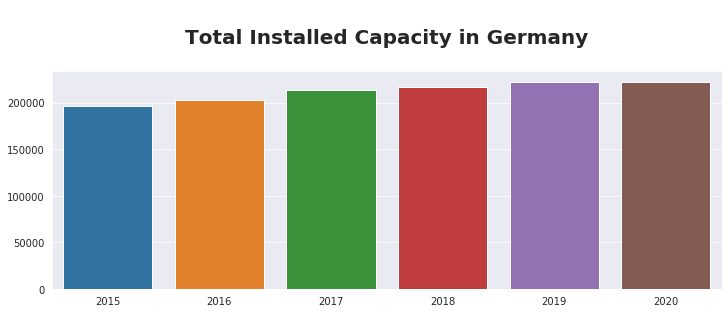

In [303]:
plt.figure(figsize=(12,4))
plt.title('\nTotal Installed Capacity in Germany\n', fontsize=20, fontweight='bold')
sns.barplot(x=installed.timestamp.apply(lambda x: x.year), 
            y=installed.drop('timestamp',axis=1).apply(sum, axis=1).values)
plt.xlabel('')
plt.ylabel('Installed Capacity [MW]')
plt.show()

In [476]:
installed.to_csv('../Data_Cleaned/installed.csv', index=False)
installed.to_pickle('../Data_Cleaned/installed.pkl')

* **Electricity Price Dataset**

In [382]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44832 entries, 0 to 9719
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Date                                  44832 non-null  object
 1   Time of day                           44832 non-null  object
 2   Germany/Luxembourg[Euro/MWh]          44832 non-null  object
 3   Denmark 1[Euro/MWh]                   44832 non-null  object
 4   Denmark 2[Euro/MWh]                   44832 non-null  object
 5   France[Euro/MWh]                      44832 non-null  object
 6   Northern Italy[Euro/MWh]              44832 non-null  object
 7   Netherlands[Euro/MWh]                 44832 non-null  object
 8   Poland[Euro/MWh]                      44832 non-null  object
 9   Sweden 4[Euro/MWh]                    44832 non-null  object
 10  Switzerland[Euro/MWh]                 44832 non-null  object
 11  Slovenia[Euro/MWh]           

In [383]:
price.describe()

,Date,Time of day,Germany/Luxembourg[Euro/MWh],Denmark 1[Euro/MWh],Denmark 2[Euro/MWh],France[Euro/MWh],Northern Italy[Euro/MWh],Netherlands[Euro/MWh],Poland[Euro/MWh],Sweden 4[Euro/MWh],Switzerland[Euro/MWh],Slovenia[Euro/MWh],Czech Republic[Euro/MWh],Hungary[Euro/MWh],Austria[Euro/MWh],Germany/Austria/Luxembourg[Euro/MWh]
count,44832,44832,44832,44832,44832,44832,44832,44832,44832,44832,44832,44832.0,44832,44832,44832,44832
unique,1866,24,4832,10541,10717,7892,5813,6526,3961,10078,7618,11304.0,10729,12206,4559,6590
top,"Jan 1, 2017",2:00 AM,-,-,-,-,-,-,-,-,-,50.0,-,-,-,-
freq,48,1868,33071,216,192,288,19224,408,28679,192,240,303.0,240,192,32999,12073


**Correct Datatypes**

In [384]:
price['timestamp']= price.apply(lambda x: (x['Date']+x['Time of day']), axis=1 )\
                                     .apply(lambda x: datetime.strptime(x, '%b %d, %Y%I:%M %p'))\
                                     .apply(lambda x: pd.to_datetime(x))

**Keep necessary columns and drop others**

In [385]:
price=price[['timestamp','Germany/Austria/Luxembourg[Euro/MWh]']]

In [386]:
price.head()

,timestamp,Germany/Austria/Luxembourg[Euro/MWh]
0,2015-01-01 00:00:00,-
1,2015-01-01 01:00:00,-
2,2015-01-01 02:00:00,-
3,2015-01-01 03:00:00,-
4,2015-01-01 04:00:00,-


**Rename Columns**

In [387]:
price.rename(columns={'Germany/Austria/Luxembourg[Euro/MWh]':'Price [Euro/MWh]'}, inplace=True)

**Correct the data range**

In [388]:
price= price[price.timestamp.apply(lambda x: x.year) != 2020]

In [389]:
price.describe(include='all')

,timestamp,Price [Euro/MWh]
count,43872,43872
unique,43819,6590
top,2017-01-01 10:00:00,-
freq,2,11113
first,2015-01-01 00:00:00,NaN
last,2019-12-31 23:00:00,NaN


**Check duplicates**

In [390]:
price.duplicated().sum()

51

In [391]:
price.drop_duplicates(inplace=True)

In [392]:
price.duplicated().sum()

0

In [393]:
price.timestamp.duplicated().sum()

2

In [394]:
price= price[~price.timestamp.duplicated()]

In [395]:
price.timestamp.duplicated().sum()

0

**Missing Timesteps**

In [396]:
must_be_timesteps= (price.timestamp.max()-price.timestamp.min())/pd.to_timedelta(1,unit='h')+1

In [397]:
print('Existing Timesteps: ', price.shape[0])
print('Target Timesteps:   ', must_be_timesteps)
print('missing Timesteps:  ', must_be_timesteps-price.shape[0])

Existing Timesteps:  43819
Target Timesteps:    43824.0
missing Timesteps:   5.0


In [398]:
# creating reference DatetimeIndex idx_ref with a 1-hour frequency
idx_ref = pd.date_range(start=price.timestamp.min(), end=price.timestamp.max(),freq='h')

# idx_dat represents your DatetimeIndex from the sensor
gaps = idx_ref[~idx_ref.isin(price.timestamp)]

In [399]:
gaps

DatetimeIndex(['2015-03-29 02:00:00', '2016-03-27 02:00:00',
               '2017-03-26 02:00:00', '2018-03-25 02:00:00',
               '2019-03-31 02:00:00'],
              dtype='datetime64[ns]', freq=None)

In [400]:
# Dataframe for missing time steps
gaps_pr= pd.DataFrame({'timestamp':gaps})

In [401]:
# Add missing timesteps with NaN value
price= pd.concat([price,gaps_pr]).sort_values(by='timestamp').reset_index(drop=True)

**Missing Values**

In [402]:
price.head()

,timestamp,Price [Euro/MWh]
0,2015-01-01 00:00:00,-
1,2015-01-01 01:00:00,-
2,2015-01-01 02:00:00,-
3,2015-01-01 03:00:00,-
4,2015-01-01 04:00:00,-


In [403]:
price['Price [Euro/MWh]'] = price['Price [Euro/MWh]']\
                            .apply(lambda x: np.nan if x=='-' else x)\
                            .astype(float)

In [404]:
price.isna().sum()

timestamp               0
Price [Euro/MWh]    11092
dtype: int64

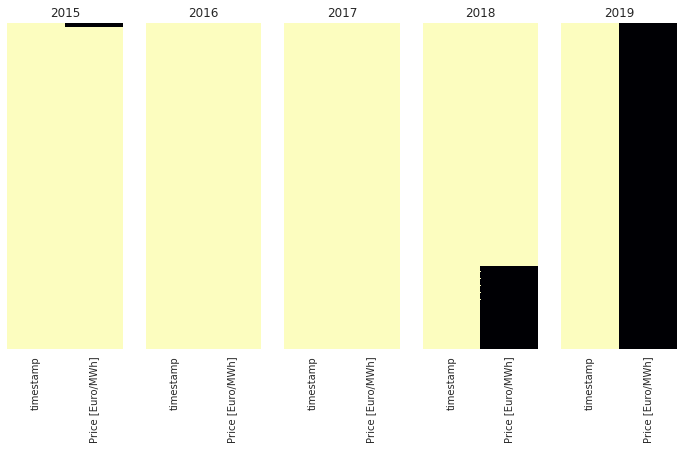

In [405]:
plt.figure(figsize=(12,6))
plt.subplot(1,5,1)
plt.title('2015')
sns.heatmap(price[price.timestamp.apply(lambda x: x.year) == 2015].isnull(),
            yticklabels=False,cbar=False,cmap='magma_r')
plt.subplot(1,5,2)
plt.title('2016')
sns.heatmap(price[price.timestamp.apply(lambda x: x.year) == 2016].isnull(),
            yticklabels=False,cbar=False,cmap='magma_r')
plt.subplot(1,5,3)
plt.title('2017')
sns.heatmap(price[price.timestamp.apply(lambda x: x.year) == 2017].isnull(),
            yticklabels=False,cbar=False,cmap='magma_r')
plt.subplot(1,5,4)
plt.title('2018')
sns.heatmap(price[price.timestamp.apply(lambda x: x.year) == 2018].isnull(),
            yticklabels=False,cbar=False,cmap='magma_r')
plt.subplot(1,5,5)
plt.title('2019')
sns.heatmap(price[price.timestamp.apply(lambda x: x.year) == 2019].isnull(),
            yticklabels=False,cbar=False,cmap='magma_r')

These missing values can be found at *Germany/Luxembourg[Euro/MWh]* column.

In [406]:
price_2= pd.concat([price1,price2,price3], axis=0)

In [407]:
price_2['timestamp']= price_2.apply(lambda x: (x['Date']+x['Time of day']), axis=1 )\
                                     .apply(lambda x: datetime.strptime(x, '%b %d, %Y%I:%M %p'))\
                                     .apply(lambda x: pd.to_datetime(x))

In [408]:
price_2=price_2[['timestamp','Germany/Luxembourg[Euro/MWh]']]

In [409]:
price_2.rename(columns={'Germany/Luxembourg[Euro/MWh]':'Price [Euro/MWh]'}, inplace=True)

In [410]:
price_2= price_2[price_2.timestamp.apply(lambda x: x.year) != 2020]

In [411]:
price_2.drop_duplicates(inplace=True)

In [412]:
price_2= price_2[~price_2.timestamp.duplicated()]

In [413]:
must_be_timesteps= (price_2.timestamp.max()-price_2.timestamp.min())/pd.to_timedelta(1,unit='h')+1

In [414]:
# creating reference DatetimeIndex idx_ref with a 1-hour frequency
idx_ref = pd.date_range(start=price_2.timestamp.min(), end=price_2.timestamp.max(),freq='h')

# idx_dat represents your DatetimeIndex from the sensor
gaps = idx_ref[~idx_ref.isin(price_2.timestamp)]

In [415]:
# Dataframe for missing time steps
gaps_pr= pd.DataFrame({'timestamp':gaps})

In [416]:
# Add missing timesteps with NaN value
price_2= pd.concat([price_2,gaps_pr]).sort_values(by='timestamp').reset_index(drop=True)

In [417]:
price_2['Price [Euro/MWh]'] = price_2['Price [Euro/MWh]']\
                            .apply(lambda x: np.nan if x=='-' else x)\
                            .astype(float)

In [418]:
price_2.isna().sum()

timestamp               0
Price [Euro/MWh]    32905
dtype: int64

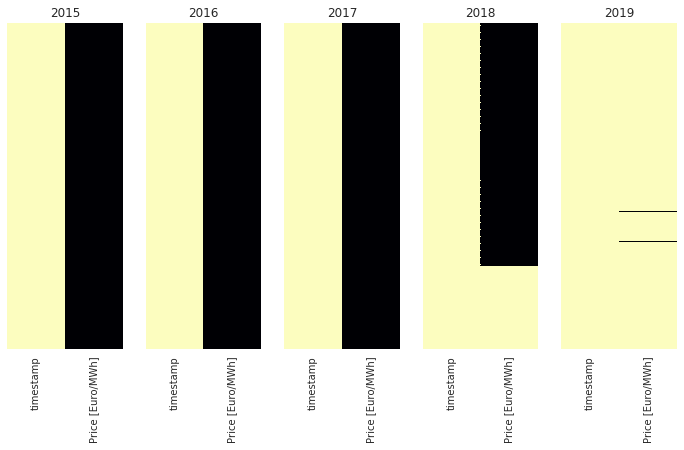

In [419]:
plt.figure(figsize=(12,6))
plt.subplot(1,5,1)
plt.title('2015')
sns.heatmap(price_2[price_2.timestamp.apply(lambda x: x.year) == 2015].isnull(),
            yticklabels=False,cbar=False,cmap='magma_r')
plt.subplot(1,5,2)
plt.title('2016')
sns.heatmap(price_2[price_2.timestamp.apply(lambda x: x.year) == 2016].isnull(),
            yticklabels=False,cbar=False,cmap='magma_r')
plt.subplot(1,5,3)
plt.title('2017')
sns.heatmap(price_2[price_2.timestamp.apply(lambda x: x.year) == 2017].isnull(),
            yticklabels=False,cbar=False,cmap='magma_r')
plt.subplot(1,5,4)
plt.title('2018')
sns.heatmap(price_2[price_2.timestamp.apply(lambda x: x.year) == 2018].isnull(),
            yticklabels=False,cbar=False,cmap='magma_r')
plt.subplot(1,5,5)
plt.title('2019')
sns.heatmap(price_2[price_2.timestamp.apply(lambda x: x.year) == 2019].isnull(),
            yticklabels=False,cbar=False,cmap='magma_r')

**Merging these two dataframes together**

In [425]:
price= pd.concat([price.dropna(),price_2.dropna()])

In [427]:
must_be_timesteps= (price.timestamp.max()-price.timestamp.min())/pd.to_timedelta(1,unit='h')+1
# creating reference DatetimeIndex idx_ref with a 1-hour frequency
idx_ref = pd.date_range(start=price.timestamp.min(), end=price.timestamp.max(),freq='h')
# idx_dat represents your DatetimeIndex from the sensor
gaps = idx_ref[~idx_ref.isin(price.timestamp)]
# Dataframe for missing time steps
gaps_pr= pd.DataFrame({'timestamp':gaps})
# Add missing timesteps with NaN value
price= pd.concat([price,gaps_pr]).sort_values(by='timestamp').reset_index(drop=True)

In [428]:
price.isna().sum()

timestamp            0
Price [Euro/MWh]    53
dtype: int64

In [432]:
price[price['Price [Euro/MWh]'].isna()]

,timestamp,Price [Euro/MWh]
1970,2015-03-29 02:00:00,NaN
10706,2016-03-27 02:00:00,NaN
19442,2017-03-26 02:00:00,NaN
28178,2018-03-25 02:00:00,NaN
37082,2019-03-31 02:00:00,NaN
40008,2019-07-31 00:00:00,NaN
40009,2019-07-31 01:00:00,NaN
40010,2019-07-31 02:00:00,NaN
40011,2019-07-31 03:00:00,NaN
40012,2019-07-31 04:00:00,NaN


Two complete days and a few more values are missing. I copy the value of last observed day for each one.

In [466]:
idx1= price[price.timestamp.apply(lambda x: x.date())==pd.to_datetime('2019-09-03')].index

In [467]:
price.loc[idx1,'Price [Euro/MWh]']=\
(price[price.timestamp.apply(lambda x: x.date())==pd.to_datetime('2019-09-02')]['Price [Euro/MWh]'].values+\
price[price.timestamp.apply(lambda x: x.date())==pd.to_datetime('2019-09-04')]['Price [Euro/MWh]'].values)/2

In [468]:
idx2= price[price.timestamp.apply(lambda x: x.date())==pd.to_datetime('2019-07-31')].index

In [469]:
price.loc[idx2,'Price [Euro/MWh]']=\
(price[price.timestamp.apply(lambda x: x.date())==pd.to_datetime('2019-07-30')]['Price [Euro/MWh]'].values+\
price[price.timestamp.apply(lambda x: x.date())==pd.to_datetime('2019-08-01')]['Price [Euro/MWh]'].values)/2

In [470]:
price[price['Price [Euro/MWh]'].isna()]

,timestamp,Price [Euro/MWh]
1970,2015-03-29 02:00:00,NaN
10706,2016-03-27 02:00:00,NaN
19442,2017-03-26 02:00:00,NaN
28178,2018-03-25 02:00:00,NaN
37082,2019-03-31 02:00:00,NaN


In [471]:
# fill NaN values with an average of last and next valid observation
price[price.columns[1:]]=\
(price[price.columns[1:]].fillna(method='ffill')+\
price[price.columns[1:]].fillna(method='bfill'))/2

In [472]:
price['Price [Euro/MWh]'].isna().sum()

0

**Dataframe is finally ready!**

TypeError: 'str' object is not callable

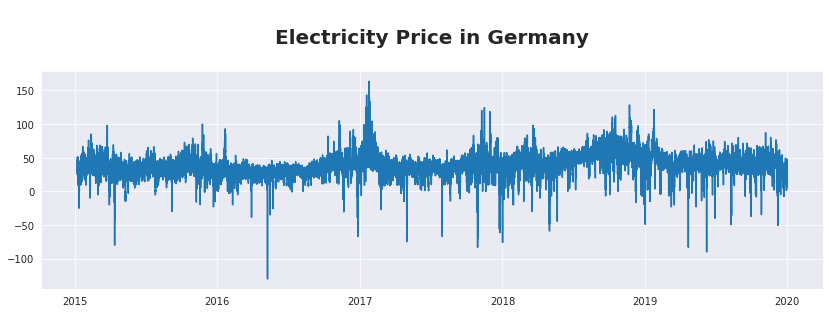

In [473]:
plt.figure(figsize=(14,4))
plt.plot(price.timestamp,
    price['Price [Euro/MWh]'].values)
plt.title('\nElectricity Price in Germany\n', fontsize=20, fontweight='bold')
plt.ylabel('Price [Euro/MWh]')
plt.show()

In [477]:
price.to_csv('../Data_Cleaned/price.csv', index=False)
price.to_pickle('../Data_Cleaned/price.pkl')

## Load

In this section, we can connect to our database and store our tables in our data warehouse. For this project, wee don't need to do this. All our data are local in this case.